In [1]:
import pandas as pd 
import gzip
%matplotlib inline
import matplotlib.pyplot as plt
import urllib
from IPython.display import Image
from pylab import *

## Function to parse .gz file
def parse(path): 
    g = gzip.open(path, 'rb') 
    for l in g: 
        yield eval(l)

## Function to convert k lines of .gz file to pandas data frame
def getDF(path, k): 
    i = 0 
    df = {} 
    for d in parse(path): 
        if(i<k):
            df[i] = d 
            i += 1 
        else:
            break
    return pd.DataFrame.from_dict(df, orient='index') 

## Function to retrieve image for a book url
def getImage(url, fout, name):
    try:
        urllib.urlretrieve(url,fout)
    except:
        print('image for book ' + name + ' not present.')

In [2]:
## Read in the book reviews and metadata
reviews = getDF('Data/reviews_Books.json.gz', k = 100)
meta = getDF('Data/meta_Books.json.gz', k = 100)

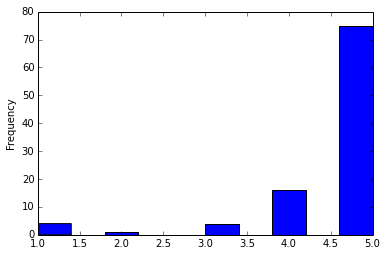

In [3]:
## Histogram for reviews of first k = 100 books
plt.figure();
reviews['overall'].plot(kind='hist')
plt.show();

In [4]:
## Take a look at the reviews
reviews.head()

,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",1019865600,Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",1395619200,The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",1031702400,I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",1383177600,It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]",1374883200,"We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...


In [5]:
## Take a look at the meta
meta.head()

,asin,salesRank,imUrl,categories,title,description,related,price
0,0001048791,{u'Books': 6334800},http://ecx.images-amazon.com/images/I/51MKP0T4...,[[Books]],"The Crucible: Performed by Stuart Pankin, Jero...",NaN,NaN,NaN
1,0001048775,{u'Books': 13243226},http://ecx.images-amazon.com/images/I/5166EBHD...,[[Books]],Measure for Measure: Complete &amp; Unabridged,William Shakespeare is widely regarded as the ...,NaN,NaN
2,0001048236,{u'Books': 8973864},http://ecx.images-amazon.com/images/I/51DH145C...,[[Books]],The Sherlock Holmes Audio Collection,"&#34;One thing is certain, Sherlockians, put a...","{u'also_viewed': [u'1442300191', u'9626349786'...",9.26
3,0000401048,{u'Books': 6448843},http://ecx.images-amazon.com/images/I/41bchvIf...,[[Books]],The rogue of publishers' row;: Confessions of ...,NaN,{u'also_viewed': [u'068240103X']},NaN
4,0001019880,{u'Books': 9589258},http://ecx.images-amazon.com/images/I/61LcHUdv...,[[Books]],Classic Soul Winner's New Testament Bible,NaN,"{u'also_viewed': [u'B003HMB5FC', u'0834004593'...",5.39


In [7]:
## Downloads the images, names them asin.jpg, and places them in the bookImgs/ dir
for i in range(meta.shape[0]):
    getImage(meta['imUrl'][i],'bookImgs/'+ meta['asin'][i]+'.jpg',meta['asin'][i])

image for book 0001018043 not present.
image for book 0001380877 not present.
image for book 0001942611 not present.
image for book 000184749X not present.
